In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set()
sns.set_theme(style="whitegrid")
sns.set_palette(palette="Paired")
# set seed
np.random.seed(7)

In [4]:
# Look up scores from the tasks and collect them in a dataframe
# All are trained with a 5 fold CV
data = {
    "avg_spearman"     : [0.7185, 0.7502, 0.7416, 0.6737, 0.77, 0.787, 0     , 0],
    "std_cv"           : [0.0178, 0.0177, 0.0084, 0.0205, 0   , 0    , 0     , 0],
    "method"           : ["Pointwise", "Pairwise", "Multi-output\npairwise", "Listwise NN", "Pointwise", "Pairwise", "Multi-output\npairwise", "Listwise NN"],
    "evaluation_type"  : ["5 fold CV", "5 fold CV", "5 fold CV", "5 fold CV", "Supervisors evaluation", "Supervisors evaluation", "Supervisors evaluation", "Supervisors evaluation"]
}
df = pd.DataFrame(data=data)
df.head(10)

,avg_spearman,std_cv,method,evaluation_type
0,0.7185,0.0178,Pointwise,5 fold CV
1,0.7502,0.0177,Pairwise,5 fold CV
2,0.7416,0.0084,Multi-output\npairwise,5 fold CV
3,0.6737,0.0205,Listwise NN,5 fold CV
4,0.7700,0.0000,Pointwise,Supervisors evaluation
5,0.7870,0.0000,Pairwise,Supervisors evaluation
6,0.0000,0.0000,Multi-output\npairwise,Supervisors evaluation
7,0.0000,0.0000,Listwise NN,Supervisors evaluation


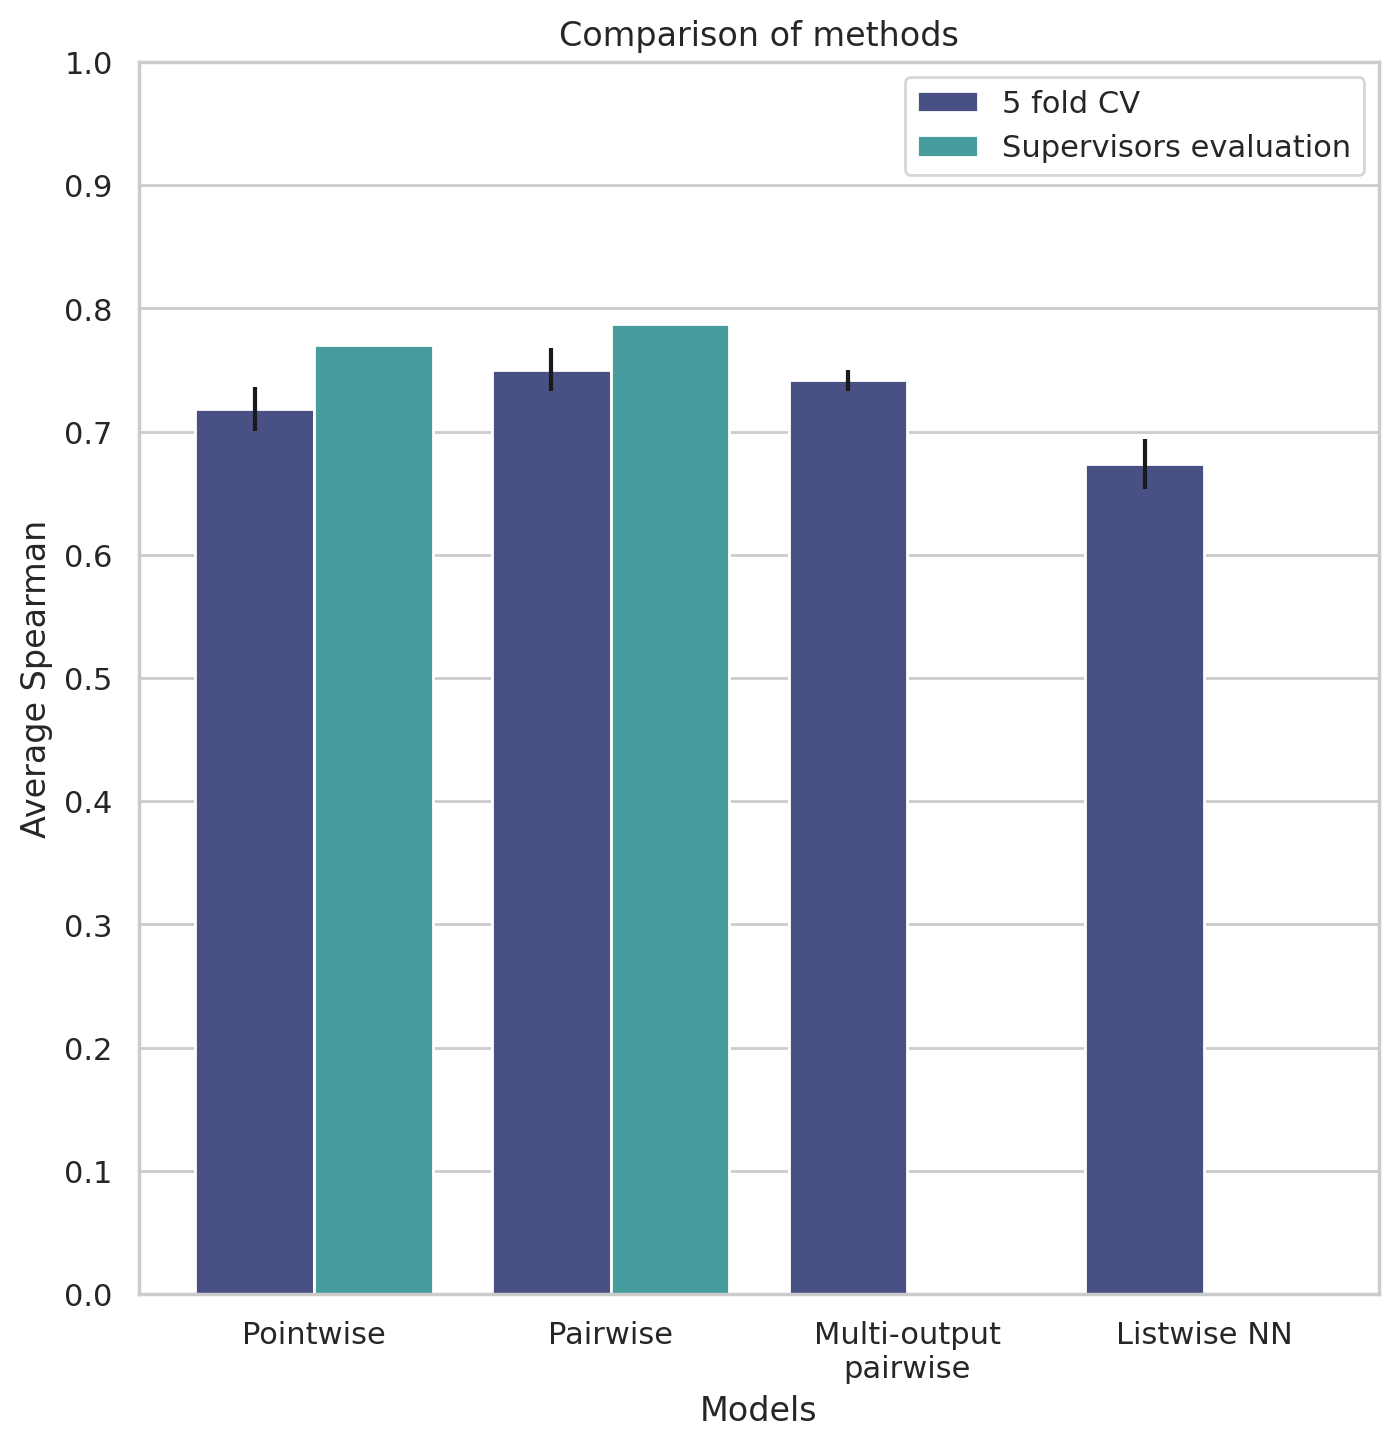

In [5]:
fig, axes = plt.subplots(figsize=(8, 8), nrows=1, ncols=1)
plot = sns.barplot(data=df, x="method", y="avg_spearman", ax=axes, palette="mako", hue="evaluation_type")  # color="b", 
plot.set(title="Comparison of methods")
plot.set_ylim([0.0, 1.0])
plot.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plot.legend(loc='upper right')
plot.set_xlabel("Models")
plot.set_ylabel("Average Spearman")

x_coords = [p.get_x() + 0.5*p.get_width() for p in plot.patches]
y_coords = [p.get_height() for p in plot.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=df["std_cv"], fmt="none", c= "k")

f = plot.get_figure()
f.savefig("Comparison_of_methods.svg")